In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals
from explore.src.data.stats_dfs import StatsData

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(bucket_name="fbref_db", blob_name="playing_time.csv")

[03/09/24 12:37:00] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=322389;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=758713;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[03/09/24 12:37:01] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=485400;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=800634;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [4]:
df.head()

rk               player nation    pos           squad            comp  \
0   1        Ismael Aaneba    FRA     DF      Strasbourg         Ligue 1   
1   2  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
3   4       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
4   5        Ignazio Abate    ITA     DF           Milan         Serie A   

    age    born  mp  mins_played  mins_per_match  mins_played_pct   90s  \
0  18.0  1999.0   0          NaN             NaN              NaN   NaN   
1  26.0  1990.0  28       2184.0            78.0             63.9  24.3   
2  21.0  1995.0   4        139.0            35.0              4.1   1.5   
3  21.0  1995.0  11        517.0            47.0             15.1   5.7   
4  30.0  1986.0  17       1057.0            62.0             30.9  11.7   

   starts  mins_per_start  complete_matches_played  subs  mins_per_sub  \
0       0             NaN                      0.0     0           NaN   
1      25             NaN                     21.0     3           NaN   
2       1             NaN                      0.0     3           NaN   
3       6             NaN                      1.0     5           NaN   
4      11             NaN                      7.0     6           NaN   

   unused_sub  points_per_match  team_goals_while_on_pitch  \
0           2               NaN                        NaN   
1           8              1.21                       31.0   
2           7              0.25                        1.0   
3           4              0.55                        2.0   
4          15              1.71                       17.0   

   team_goals_conceded_while_on_pitch  goals_minus_concded_while_on_pitch  \
0                                 NaN                                 NaN   
1                                38.0                                -7.0   
2                                 2.0                                -1.0   
3                                12.0                               -10.0   
4                                10.0                                 7.0   

   goals_minus_conceded_while_on_pitch_per_90  \
0                                         NaN   
1                                       -0.29   
2                                       -0.65   
3                                       -1.74   
4                                        0.60   

   net_goals_on_minus_off_pitch_per_90  team_xg_while_on_pitch  \
0                                  NaN                     NaN   
1                                -0.07                    32.2   
2                                -0.46                     0.4   
3                                -0.56                     2.7   
4                                 0.33                    13.8   

   team_xg_conceded_while_on_pitch  team_xg_minus_xga_while_on_pitch  \
0                              NaN                               NaN   
1                             34.7                              -2.5   
2                              2.9                              -2.6   
3                             10.0                              -7.3   
4                             11.4                               2.5   

   team_xg_minus_xga_while_on_pitch_per_90  net_xg_on_minus_off_pitch_per_90  \
0                                      NaN                               NaN   
1                                    -0.10                             -0.66   
2                                    -1.66                             -1.43   
3                                    -1.26                             -0.34   
4                                     0.21                             -0.24   

      season  
0  2017-2018  
1  2017-2018  
2  2017-2018  
3  2017-2018  
4  2017-2018

In [5]:
describe_data(df)

Data Types  Null Counts  Null %  \
rk                                              int64            0    0.00   
age                                           float64           10    0.04   
born                                          float64           10    0.04   
mp                                              int64            0    0.00   
mins_played                                   float64         3909   16.97   
mins_per_match                                float64         3909   16.97   
mins_played_pct                               float64         3886   16.87   
90s                                           float64         3886   16.87   
starts                                          int64            0    0.00   
mins_per_start                                float64         7572   32.88   
complete_matches_played                       float64          235    1.02   
subs                                            int64            0    0.00   
mins_per_sub                                  float64         8608   37.38   
unused_sub                                      int64            0    0.00   
points_per_match                              float64         3889   16.89   
team_goals_while_on_pitch                     float64         3885   16.87   
team_goals_conceded_while_on_pitch            float64         3885   16.87   
goals_minus_concded_while_on_pitch            float64         3885   16.87   
goals_minus_conceded_while_on_pitch_per_90    float64         3912   16.99   
net_goals_on_minus_off_pitch_per_90           float64         4121   17.89   
team_xg_while_on_pitch                        float64         3928   17.06   
team_xg_conceded_while_on_pitch               float64         3928   17.06   
team_xg_minus_xga_while_on_pitch              float64         3928   17.06   
team_xg_minus_xga_while_on_pitch_per_90       float64         3929   17.06   
net_xg_on_minus_off_pitch_per_90              float64         4138   17.97   

                                            Unique Values     Min      Max  \
rk                                                   3591     1.0  3591.00   
age                                                    29    14.0    42.00   
born                                                   32  1977.0  2008.00   
mp                                                     39     0.0    38.00   
mins_played                                          3232     1.0  3420.00   
mins_per_match                                         91     1.0    93.00   
mins_played_pct                                       999     0.0   100.00   
90s                                                   381     0.0    38.00   
starts                                                 39     0.0    38.00   
mins_per_start                                         86     1.0   113.00   
complete_matches_played                                39     0.0    38.00   
subs                                                   31     0.0    30.00   
mins_per_sub                                           86     0.0    86.00   
unused_sub                                             39     0.0    38.00   
points_per_match                                      268     0.0     3.00   
team_goals_while_on_pitch                              99     0.0   101.00   
team_goals_conceded_while_on_pitch                     81     0.0    91.00   
goals_minus_concded_while_on_pitch                    125   -57.0    76.00   
goals_minus_conceded_while_on_pitch_per_90            809  -360.0    90.00   
net_goals_on_minus_off_pitch_per_90                  1181  -360.0    90.50   
team_xg_while_on_pitch                                724     0.0    87.30   
team_xg_conceded_while_on_pitch                       652     0.0    75.00   
team_xg_minus_xga_while_on_pitch                      733   -42.4    62.80   
team_xg_minus_xga_while_on_pitch_per_90               961   -65.9    84.75   
net_xg_on_minus_off_pitch_per_90                      958   -65.

## Clean data

In [6]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB',

## Statistical Plots

In [7]:
stat_plots = StatisticPlots(df)

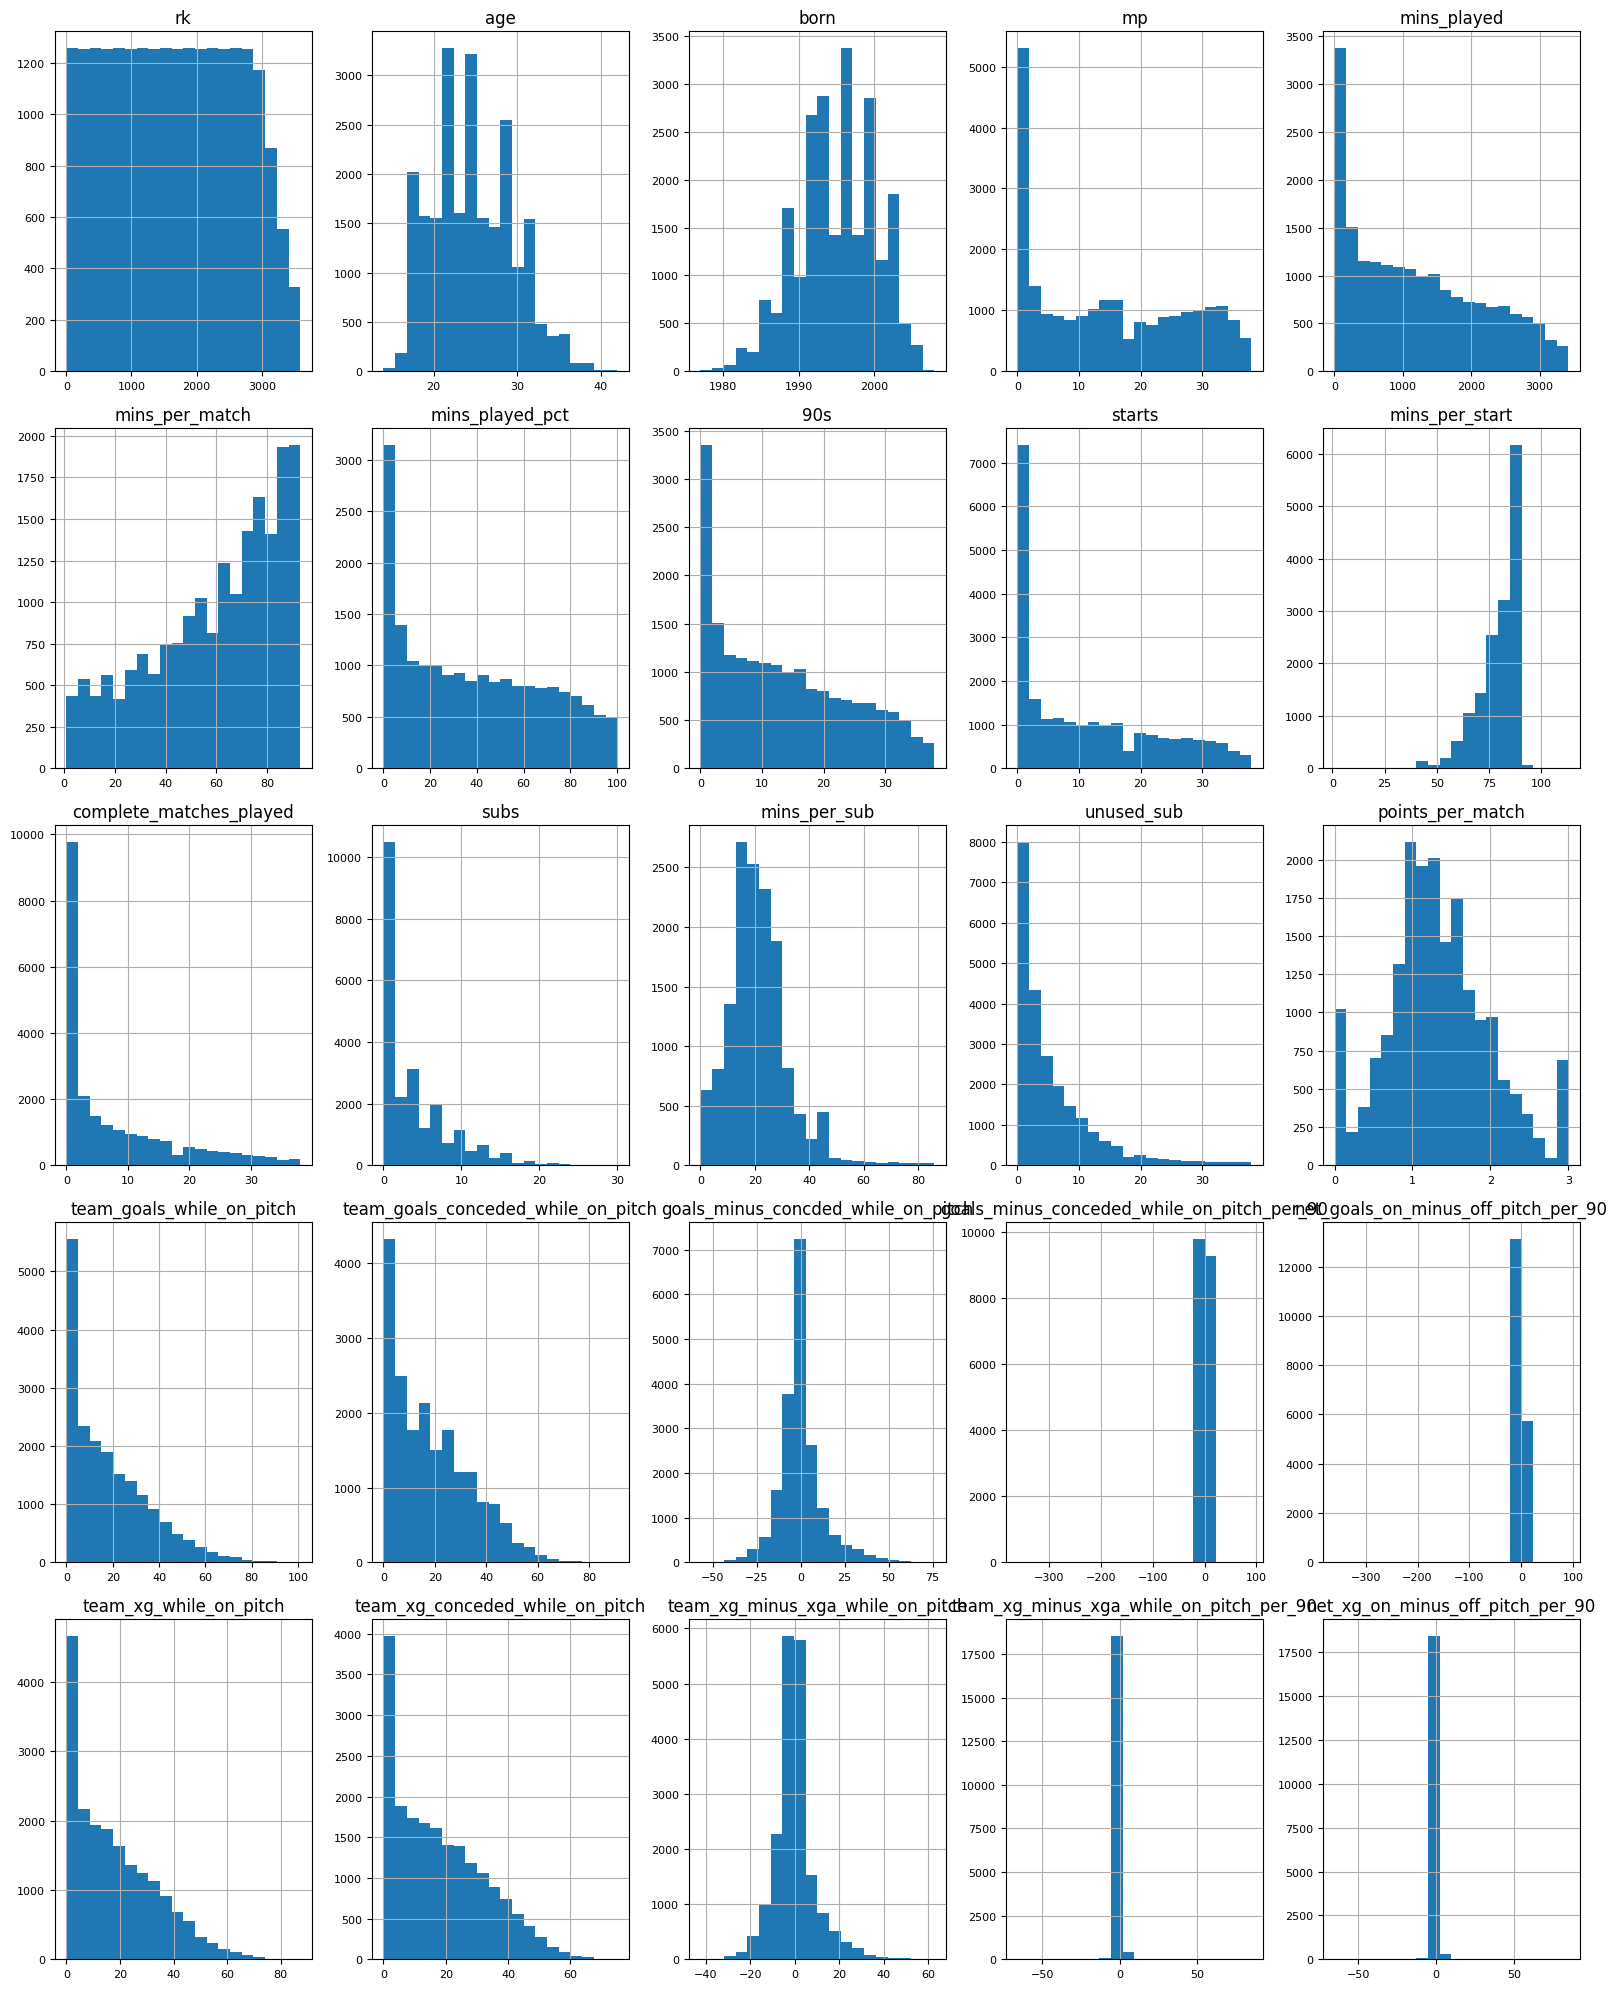

In [9]:
stat_plots.all_distributions(save_to=None)

In [10]:
# get main stat columns
cols = df.columns[9:-5]

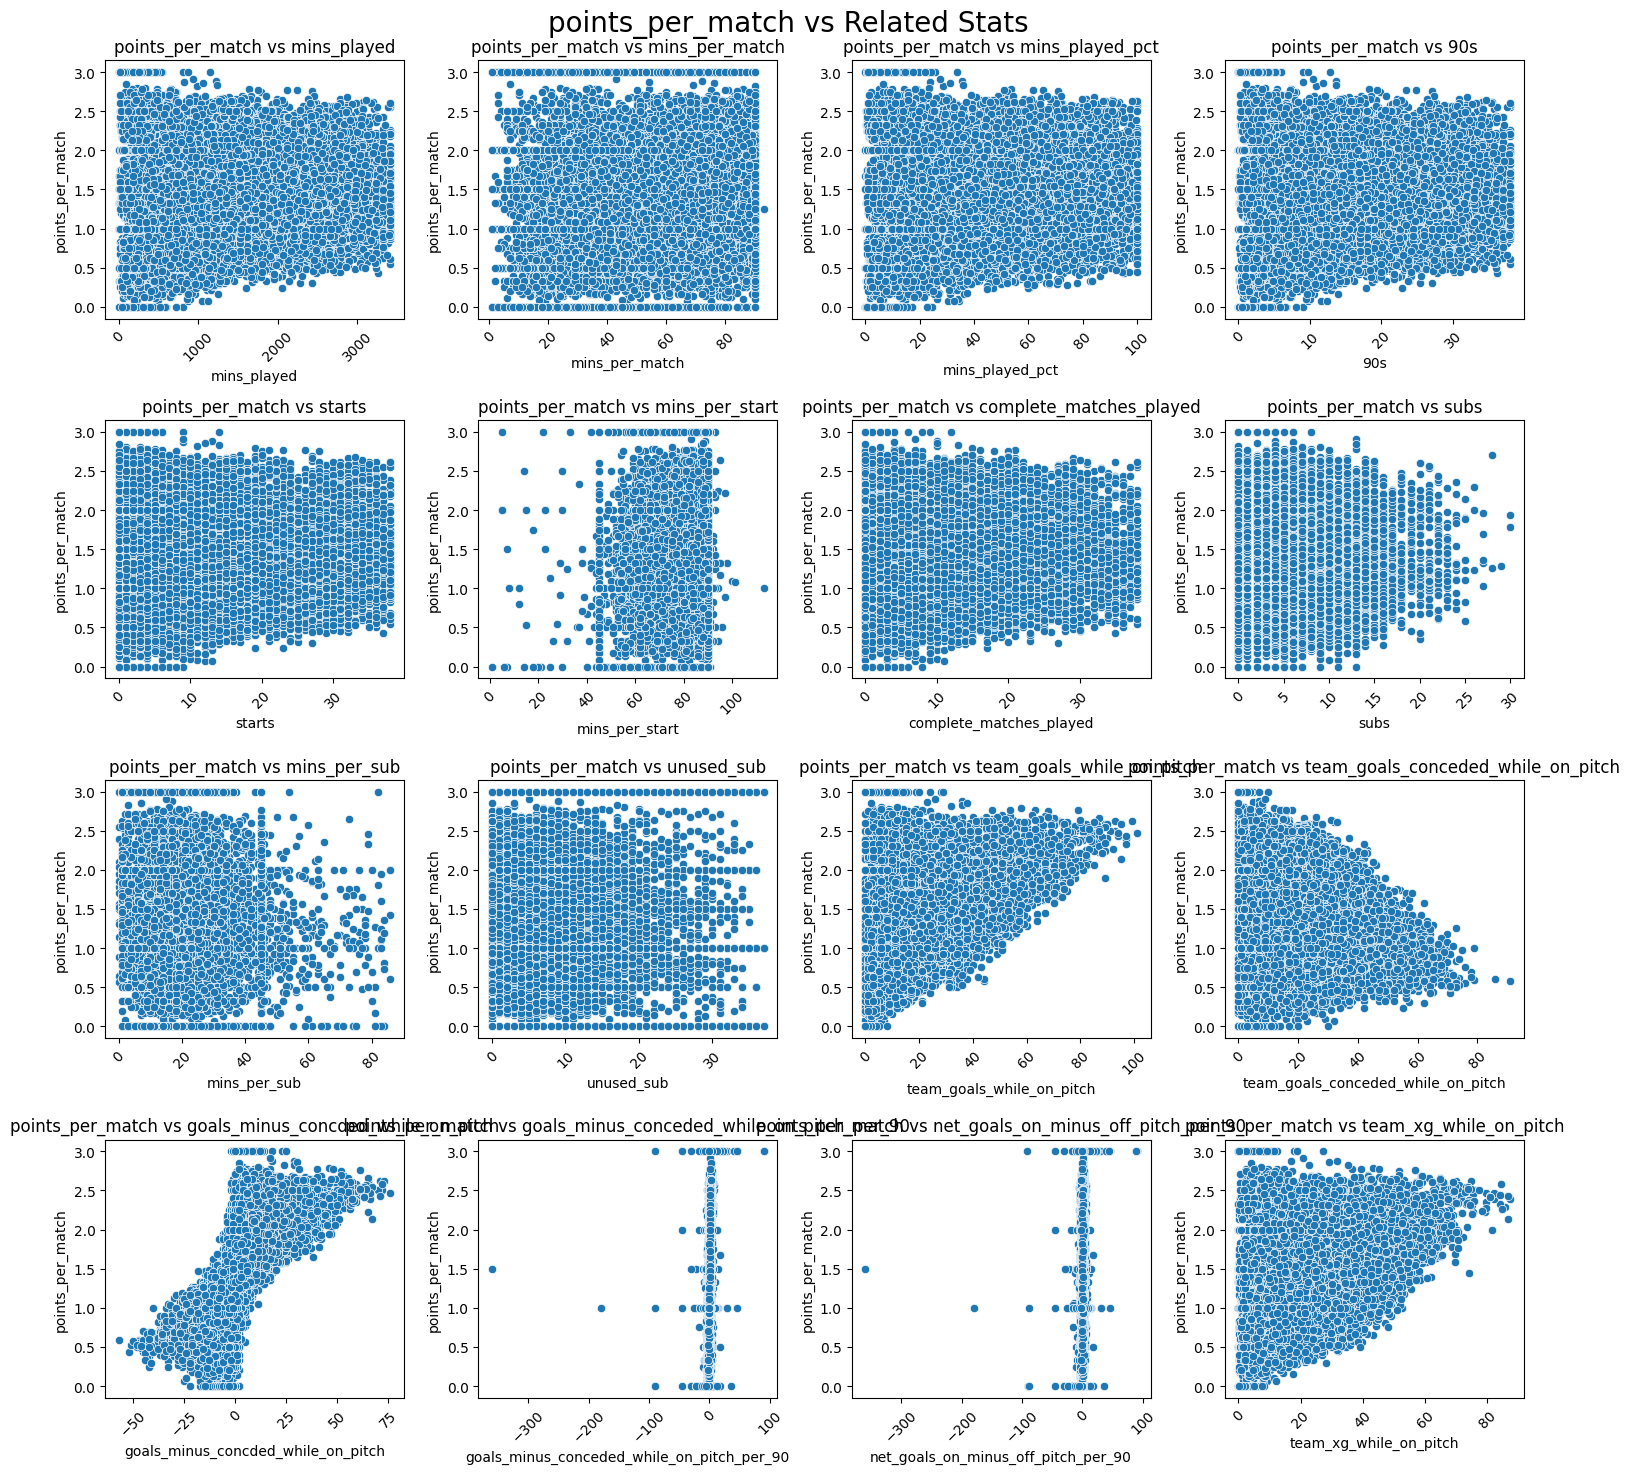

In [11]:
stat_plots.relationships(y='points_per_match', X=cols)

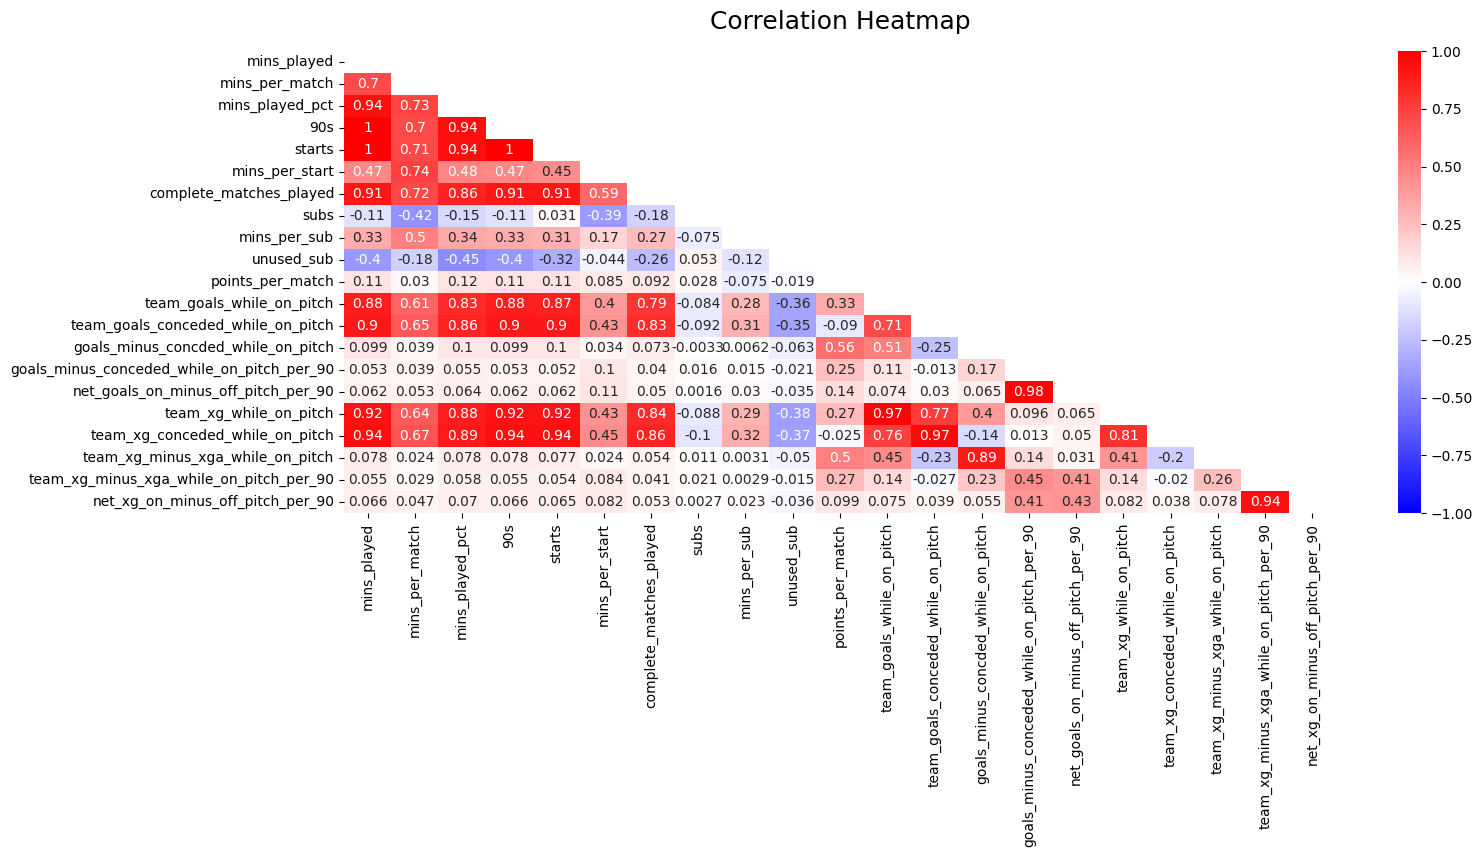

In [12]:
stat_plots.correlation_matrix(vars=cols)

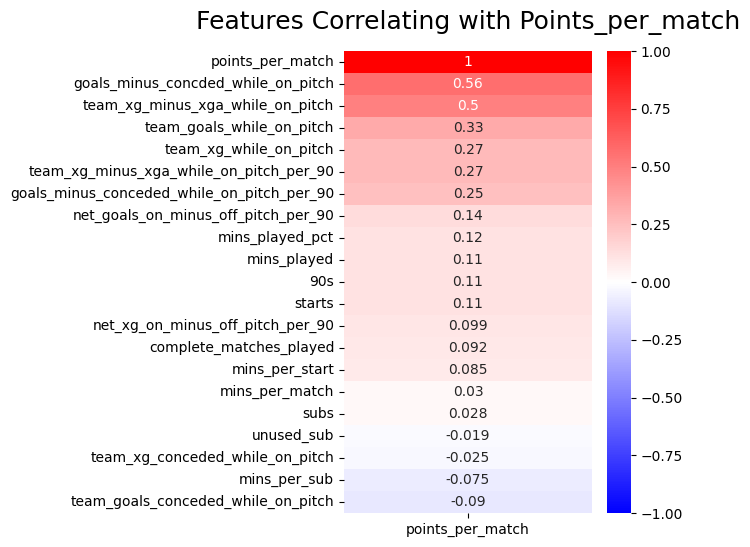

In [13]:
stat_plots.dependent_correlations(y_var='points_per_match', vars=cols)

## Investigation

- Which country has players playing the most on average in the top five leagues?
- how does this change per season? - 2023/24 will be warped
- filter this for players playing over 15 90s per season
- which league provides youth with the most experience - ligue 1?
- what is the average playing time for each position? - look by league
- which players are crucial to their team? - goals minus conceded whilst on the pitch
- do the reverse, which teams play better without certain players on the pitch?
- how does this change for players who have played above a certain amount of minutes? 

Which country has players playing the most on average in the top five leagues?

In [14]:
df.head()

rk               player nation    pos           squad            comp  \
0   1        Ismael Aaneba    FRA     DF      Strasbourg         Ligue 1   
1   2  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
3   4       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
4   5        Ignazio Abate    ITA     DF           Milan         Serie A   

    age    born  mp  mins_played  mins_per_match  mins_played_pct   90s  \
0  18.0  1999.0   0          NaN             NaN              NaN   NaN   
1  26.0  1990.0  28       2184.0            78.0             63.9  24.3   
2  21.0  1995.0   4        139.0            35.0              4.1   1.5   
3  21.0  1995.0  11        517.0            47.0             15.1   5.7   
4  30.0  1986.0  17       1057.0            62.0             30.9  11.7   

   starts  mins_per_start  complete_matches_played  subs  mins_per_sub  \
0       0             NaN                      0.0     0           NaN   
1      25             NaN                     21.0     3           NaN   
2       1             NaN                      0.0     3           NaN   
3       6             NaN                      1.0     5           NaN   
4      11             NaN                      7.0     6           NaN   

   unused_sub  points_per_match  team_goals_while_on_pitch  \
0           2               NaN                        NaN   
1           8              1.21                       31.0   
2           7              0.25                        1.0   
3           4              0.55                        2.0   
4          15              1.71                       17.0   

   team_goals_conceded_while_on_pitch  goals_minus_concded_while_on_pitch  \
0                                 NaN                                 NaN   
1                                38.0                                -7.0   
2                                 2.0                                -1.0   
3                                12.0                               -10.0   
4                                10.0                                 7.0   

   goals_minus_conceded_while_on_pitch_per_90  \
0                                         NaN   
1                                       -0.29   
2                                       -0.65   
3                                       -1.74   
4                                        0.60   

   net_goals_on_minus_off_pitch_per_90  team_xg_while_on_pitch  \
0                                  NaN                     NaN   
1                                -0.07                    32.2   
2                                -0.46                     0.4   
3                                -0.56                     2.7   
4                                 0.33                    13.8   

   team_xg_conceded_while_on_pitch  team_xg_minus_xga_while_on_pitch  \
0                              NaN                               NaN   
1                             34.7                              -2.5   
2                              2.9                              -2.6   
3                             10.0                              -7.3   
4                             11.4                               2.5   

   team_xg_minus_xga_while_on_pitch_per_90  net_xg_on_minus_off_pitch_per_90  \
0                                      NaN                               NaN   
1                                    -0.10                             -0.66   
2                                    -1.66                             -1.43   
3                                    -1.26                             -0.34   
4                                     0.21                             -0.24   

      season general_pos age_range      country continent  
0  2017-2018    Defender  Under 20       France    Europe  
1  2017-2018    Defender     25-29  Netherlands    Europe  
2  2017-2018  Midfielder    

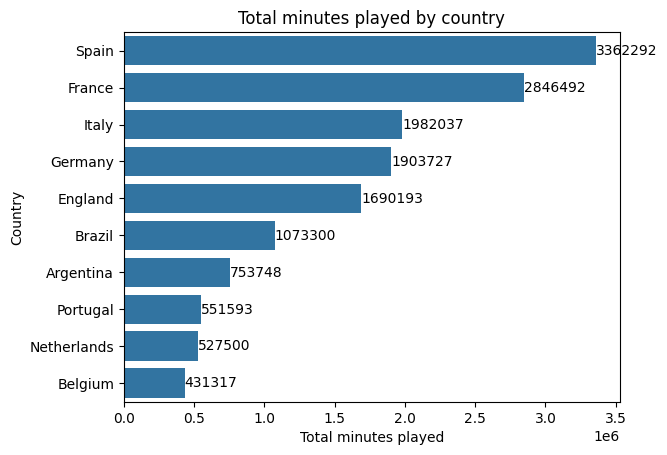

In [25]:
data = df.groupby('country')['mins_played'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=data.values.astype(int), y=data.index)

# annotate the bars with the values
for i, v in enumerate(data.values.astype(int)):
    plt.text(v, i, str(v), color='k', va='center')
    
plt.title('Total minutes played by country')
plt.xlabel('Total minutes played')
plt.ylabel('Country')
plt.show()

- how does this change per season? - 2023/24 will be warped

In [28]:
countries = data.index

In [41]:
# how does this change per season?
data_2 = df.groupby(['season', 'country'])['mins_played'].sum().reset_index()
data_2 = data_2.loc[data_2['country'].isin(countries)]

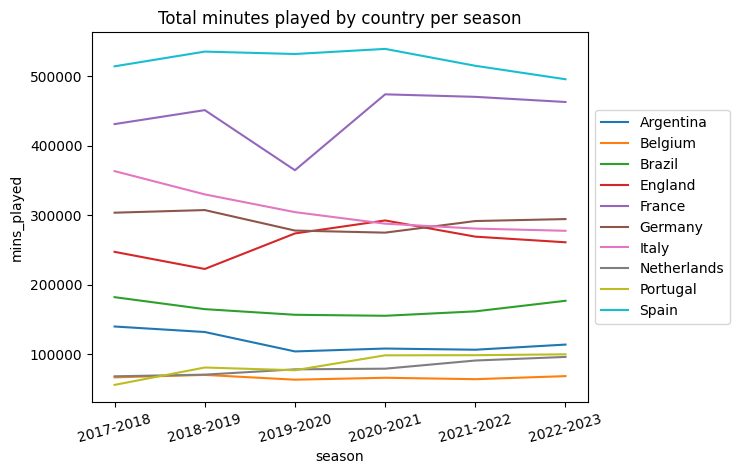

In [43]:
sns.lineplot(data=data_2.loc[data_2['season'] != '2023-2024'], x='season', y='mins_played', hue='country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# rotate the x-axis labels
plt.xticks(rotation=15)
plt.title('Total minutes played by country per season')
plt.show()

- filter this for players playing over 15 90s per season
- analyse 2023-24 seperately

In [53]:
data_3 = df.loc[(df['90s'] > 15) & (df['season'] != '2023-2024') & (df['country'].isin(countries))]
data_3 = data_3.groupby(['season', 'country'])['mins_played'].sum().reset_index()

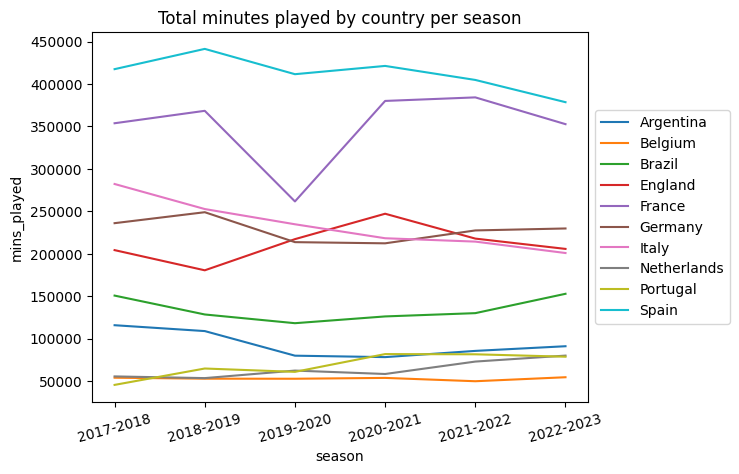

In [54]:
sns.lineplot(data=data_3.loc[data_3['season'] != '2023-2024'], x='season', y='mins_played', hue='country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# rotate the x-axis labels
plt.xticks(rotation=15)
plt.title('Total minutes played by country per season')
plt.show()

In [55]:
df.head()

rk               player nation    pos           squad            comp  \
0   1        Ismael Aaneba    FRA     DF      Strasbourg         Ligue 1   
1   2  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
3   4       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
4   5        Ignazio Abate    ITA     DF           Milan         Serie A   

    age    born  mp  mins_played  mins_per_match  mins_played_pct   90s  \
0  18.0  1999.0   0          NaN             NaN              NaN   NaN   
1  26.0  1990.0  28       2184.0            78.0             63.9  24.3   
2  21.0  1995.0   4        139.0            35.0              4.1   1.5   
3  21.0  1995.0  11        517.0            47.0             15.1   5.7   
4  30.0  1986.0  17       1057.0            62.0             30.9  11.7   

   starts  mins_per_start  complete_matches_played  subs  mins_per_sub  \
0       0             NaN                      0.0     0           NaN   
1      25             NaN                     21.0     3           NaN   
2       1             NaN                      0.0     3           NaN   
3       6             NaN                      1.0     5           NaN   
4      11             NaN                      7.0     6           NaN   

   unused_sub  points_per_match  team_goals_while_on_pitch  \
0           2               NaN                        NaN   
1           8              1.21                       31.0   
2           7              0.25                        1.0   
3           4              0.55                        2.0   
4          15              1.71                       17.0   

   team_goals_conceded_while_on_pitch  goals_minus_concded_while_on_pitch  \
0                                 NaN                                 NaN   
1                                38.0                                -7.0   
2                                 2.0                                -1.0   
3                                12.0                               -10.0   
4                                10.0                                 7.0   

   goals_minus_conceded_while_on_pitch_per_90  \
0                                         NaN   
1                                       -0.29   
2                                       -0.65   
3                                       -1.74   
4                                        0.60   

   net_goals_on_minus_off_pitch_per_90  team_xg_while_on_pitch  \
0                                  NaN                     NaN   
1                                -0.07                    32.2   
2                                -0.46                     0.4   
3                                -0.56                     2.7   
4                                 0.33                    13.8   

   team_xg_conceded_while_on_pitch  team_xg_minus_xga_while_on_pitch  \
0                              NaN                               NaN   
1                             34.7                              -2.5   
2                              2.9                              -2.6   
3                             10.0                              -7.3   
4                             11.4                               2.5   

   team_xg_minus_xga_while_on_pitch_per_90  net_xg_on_minus_off_pitch_per_90  \
0                                      NaN                               NaN   
1                                    -0.10                             -0.66   
2                                    -1.66                             -1.43   
3                                    -1.26                             -0.34   
4                                     0.21                             -0.24   

      season general_pos age_range      country continent  
0  2017-2018    Defender  Under 20       France    Europe  
1  2017-2018    Defender     25-29  Netherlands    Europe  
2  2017-2018  Midfielder    

In [60]:
# which league offers the most minutes to under 20s?
data_4 = df.loc[(df['age'] < 20)]
data_4 = data_4.groupby('comp')['mins_played'].sum().sort_values(ascending=False)

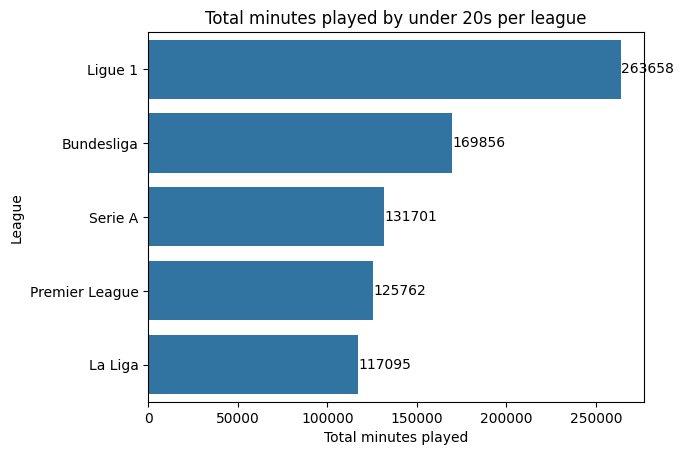

In [63]:
sns.barplot(x=data_4.values.astype(int), y=data_4.index)
# annotate
for i, v in enumerate(data_4.values.astype(int)):
    plt.text(v, i, str(v), color='k', va='center')
    
plt.title('Total minutes played by under 20s per league')
plt.xlabel('Total minutes played')
plt.ylabel('League')
plt.show()

In [82]:
# how does this change per season?
def plot_league_season(df: pd.DataFrame, stat: str, age_less_than: int) -> None:
    data = df.loc[((df['age'] < age_less_than)) & (df['season'] != '2023-2024')]
    data = data.groupby(['season', 'comp'])[stat].sum().reset_index()
    sns.lineplot(data=data, x='season', y=stat, hue='comp')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Total {stat} by under {age_less_than}s per league per season')
    plt.xticks(rotation=15)
    plt.xlabel('Season')
    plt.ylabel('Total minutes played')
    plt.show()

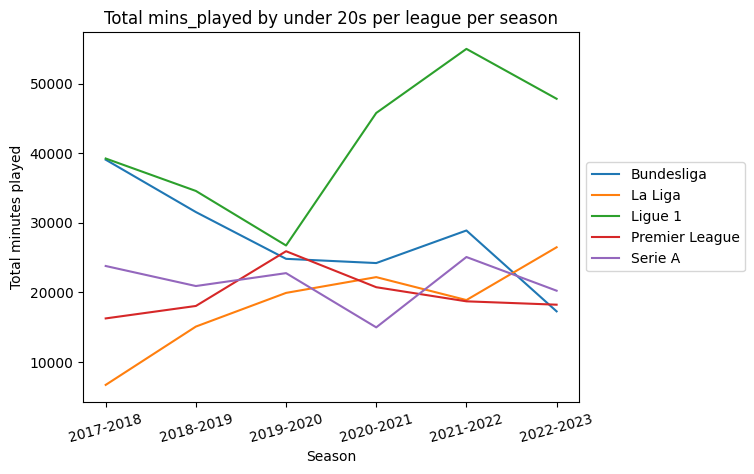

In [79]:
plot_league_season(df, 'mins_played', age_less_than=20)

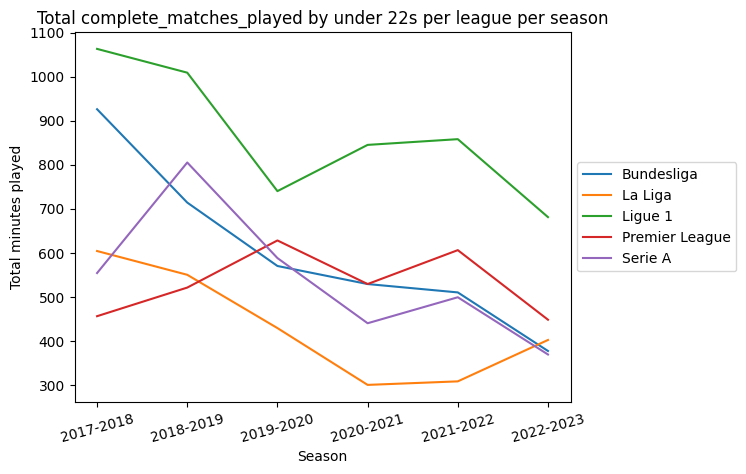

In [84]:
plot_league_season(df, 'complete_matches_played', age_less_than=22)

what is the average playing time for each position? - look by league


In [87]:
df.groupby('pos')['mins_played'].mean().sort_values(ascending=False)

pos
GK       1508.450251
DF       1369.749219
MF       1199.957946
DF,MF    1118.400000
DF,FW    1109.786624
MF,DF    1107.799097
MF,FW    1059.856564
FW       1059.751447
FW,MF     991.174733
FW,DF     652.562500
DF,GK            NaN
FW,GK            NaN
Name: mins_played, dtype: float64

which players are crucial to their team? - goals minus conceded whilst on the pitch

In [88]:
df.head()

rk               player nation    pos           squad            comp  \
0   1        Ismael Aaneba    FRA     DF      Strasbourg         Ligue 1   
1   2  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
3   4       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
4   5        Ignazio Abate    ITA     DF           Milan         Serie A   

    age    born  mp  mins_played  mins_per_match  mins_played_pct   90s  \
0  18.0  1999.0   0          NaN             NaN              NaN   NaN   
1  26.0  1990.0  28       2184.0            78.0             63.9  24.3   
2  21.0  1995.0   4        139.0            35.0              4.1   1.5   
3  21.0  1995.0  11        517.0            47.0             15.1   5.7   
4  30.0  1986.0  17       1057.0            62.0             30.9  11.7   

   starts  mins_per_start  complete_matches_played  subs  mins_per_sub  \
0       0             NaN                      0.0     0           NaN   
1      25             NaN                     21.0     3           NaN   
2       1             NaN                      0.0     3           NaN   
3       6             NaN                      1.0     5           NaN   
4      11             NaN                      7.0     6           NaN   

   unused_sub  points_per_match  team_goals_while_on_pitch  \
0           2               NaN                        NaN   
1           8              1.21                       31.0   
2           7              0.25                        1.0   
3           4              0.55                        2.0   
4          15              1.71                       17.0   

   team_goals_conceded_while_on_pitch  goals_minus_concded_while_on_pitch  \
0                                 NaN                                 NaN   
1                                38.0                                -7.0   
2                                 2.0                                -1.0   
3                                12.0                               -10.0   
4                                10.0                                 7.0   

   goals_minus_conceded_while_on_pitch_per_90  \
0                                         NaN   
1                                       -0.29   
2                                       -0.65   
3                                       -1.74   
4                                        0.60   

   net_goals_on_minus_off_pitch_per_90  team_xg_while_on_pitch  \
0                                  NaN                     NaN   
1                                -0.07                    32.2   
2                                -0.46                     0.4   
3                                -0.56                     2.7   
4                                 0.33                    13.8   

   team_xg_conceded_while_on_pitch  team_xg_minus_xga_while_on_pitch  \
0                              NaN                               NaN   
1                             34.7                              -2.5   
2                              2.9                              -2.6   
3                             10.0                              -7.3   
4                             11.4                               2.5   

   team_xg_minus_xga_while_on_pitch_per_90  net_xg_on_minus_off_pitch_per_90  \
0                                      NaN                               NaN   
1                                    -0.10                             -0.66   
2                                    -1.66                             -1.43   
3                                    -1.26                             -0.34   
4                                     0.21                             -0.24   

      season general_pos age_range      country continent  
0  2017-2018    Defender  Under 20       France    Europe  
1  2017-2018    Defender     25-29  Netherlands    Europe  
2  2017-2018  Midfielder    

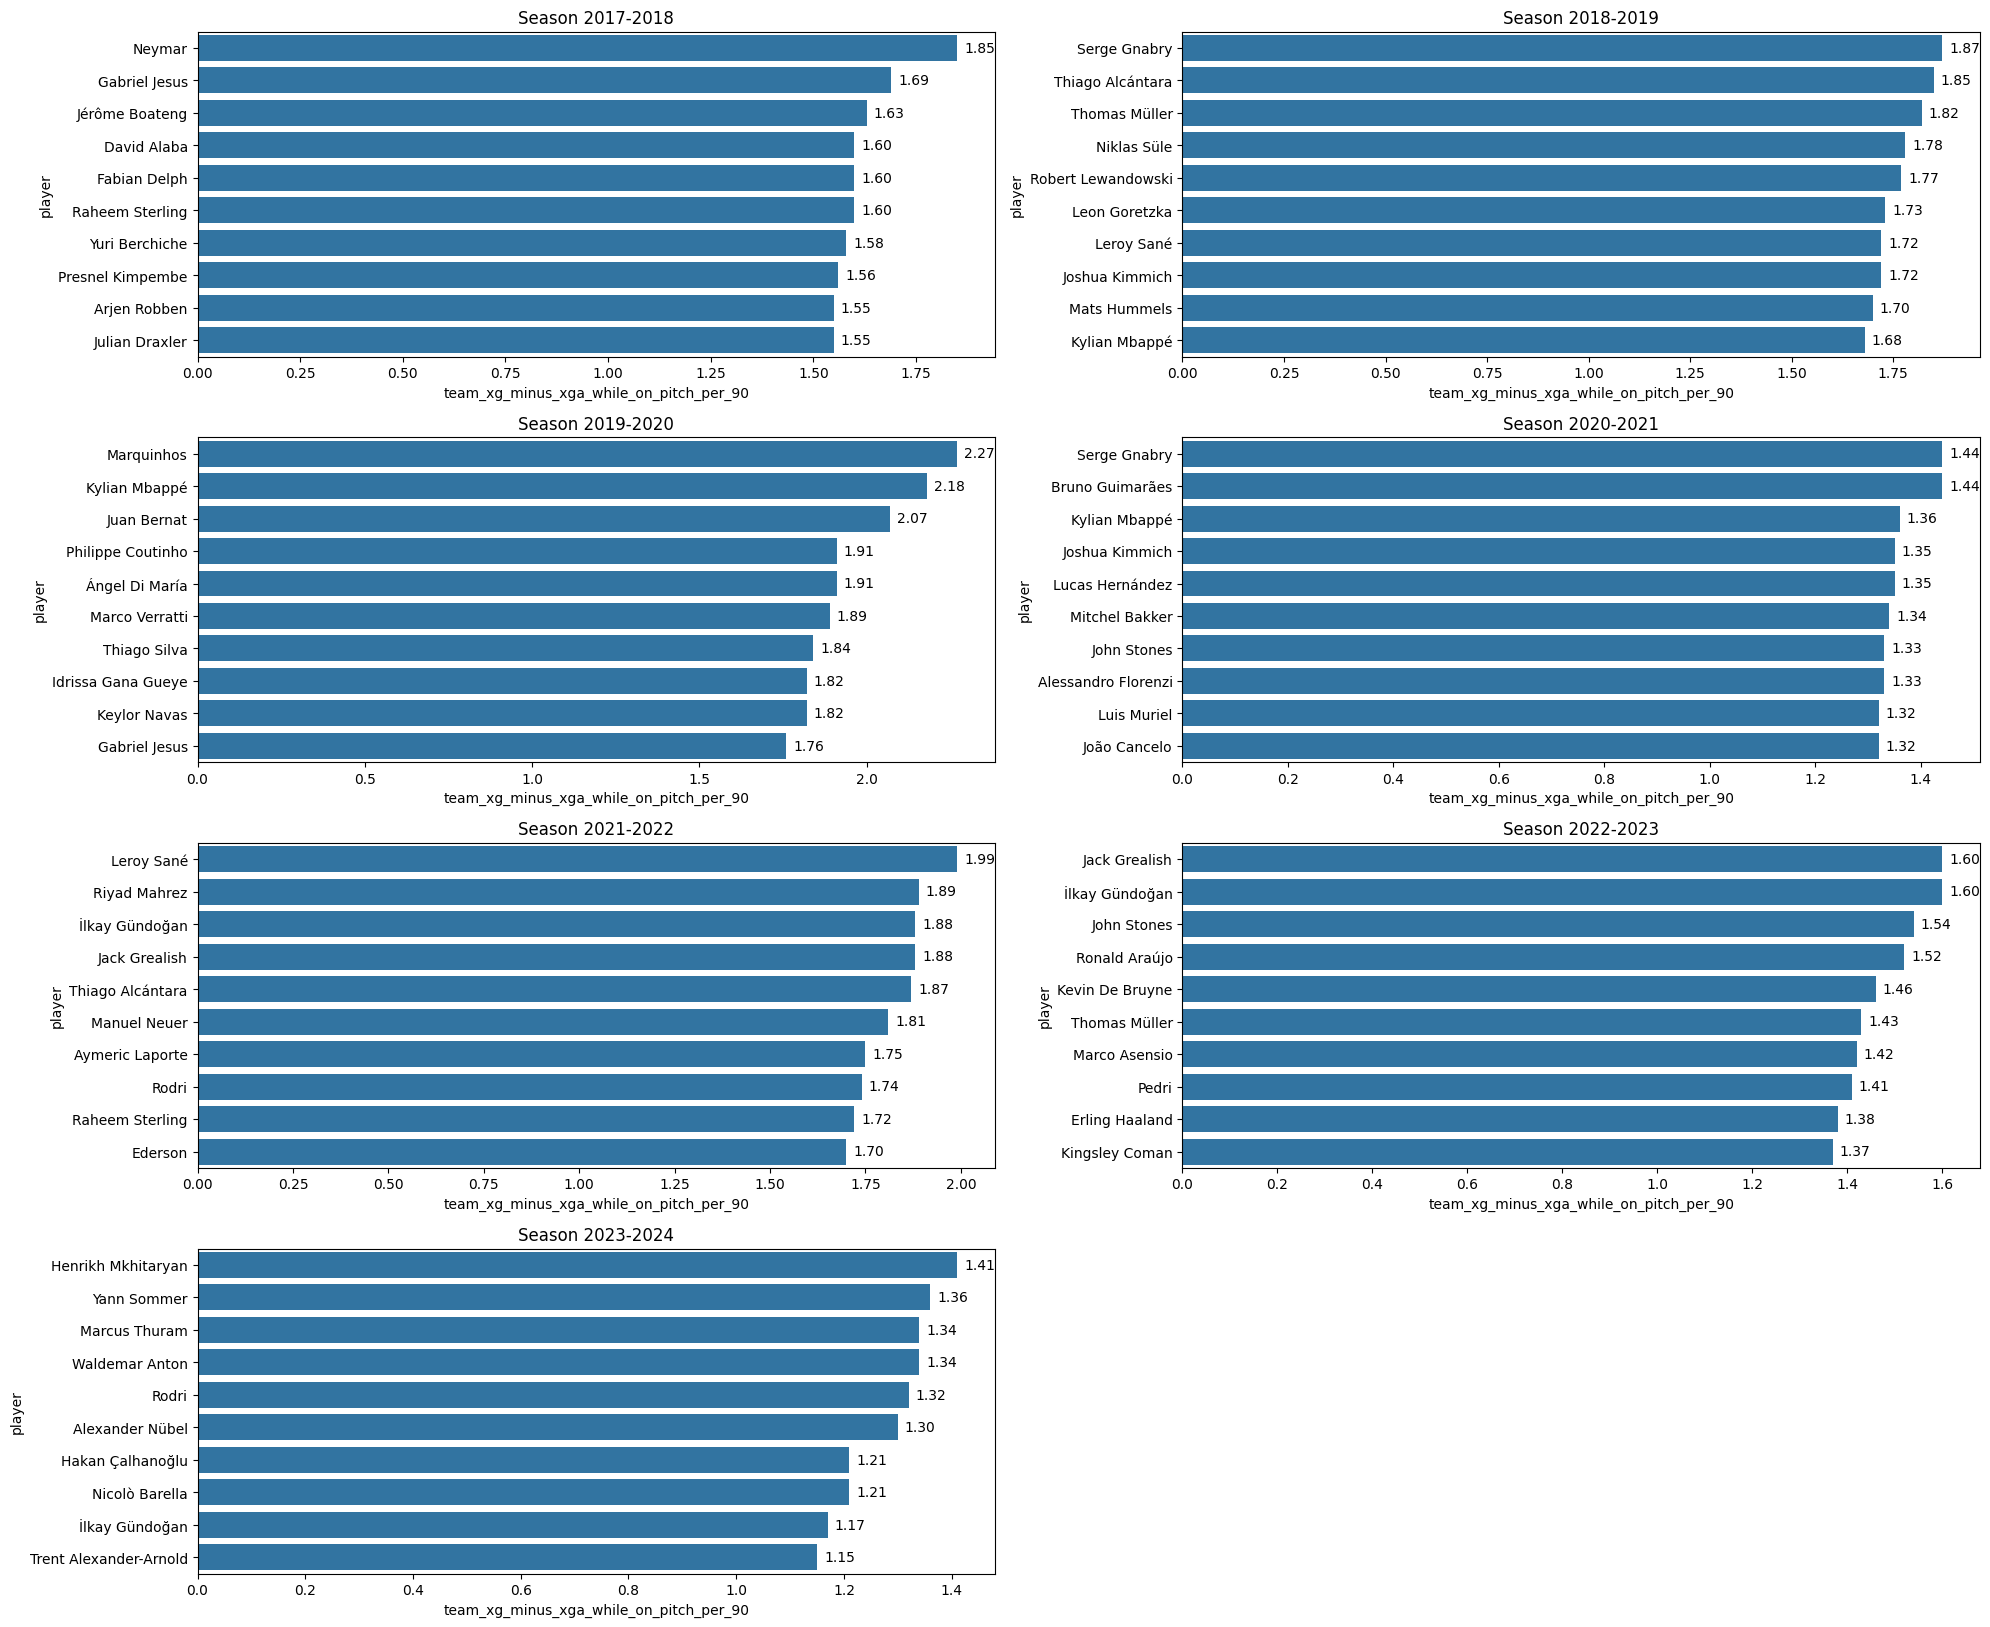

In [107]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

seasons = df["season"].unique()

# remove empty subplots
for i in range(len(seasons), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for season, ax in zip(seasons, axes.flatten()):
    data = (
        df.loc[(df["90s"] > 15) & (df["season"] == season)]
        .sort_values(by="team_xg_minus_xga_while_on_pitch_per_90", ascending=False)
        .head(10)
    )
    plots = sns.barplot(
        data=data, x="team_xg_minus_xga_while_on_pitch_per_90", y="player", ax=ax
    )

    # annotate
    for bar in plots.patches:
        plots.annotate(
            format(bar.get_width(), ".2f"),
            (bar.get_width(), bar.get_y() + bar.get_height() / 2),
            ha="left",
            va="center",
            size=10,
            xytext=(5, 0),
            textcoords="offset points",
        )
    ax.set_title(f"Season {season}")

    plt.tight_layout()

In [109]:
df.head()

rk               player nation    pos           squad            comp  \
0   1        Ismael Aaneba    FRA     DF      Strasbourg         Ligue 1   
1   2  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
3   4       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
4   5        Ignazio Abate    ITA     DF           Milan         Serie A   

    age    born  mp  mins_played  mins_per_match  mins_played_pct   90s  \
0  18.0  1999.0   0          NaN             NaN              NaN   NaN   
1  26.0  1990.0  28       2184.0            78.0             63.9  24.3   
2  21.0  1995.0   4        139.0            35.0              4.1   1.5   
3  21.0  1995.0  11        517.0            47.0             15.1   5.7   
4  30.0  1986.0  17       1057.0            62.0             30.9  11.7   

   starts  mins_per_start  complete_matches_played  subs  mins_per_sub  \
0       0             NaN                      0.0     0           NaN   
1      25             NaN                     21.0     3           NaN   
2       1             NaN                      0.0     3           NaN   
3       6             NaN                      1.0     5           NaN   
4      11             NaN                      7.0     6           NaN   

   unused_sub  points_per_match  team_goals_while_on_pitch  \
0           2               NaN                        NaN   
1           8              1.21                       31.0   
2           7              0.25                        1.0   
3           4              0.55                        2.0   
4          15              1.71                       17.0   

   team_goals_conceded_while_on_pitch  goals_minus_concded_while_on_pitch  \
0                                 NaN                                 NaN   
1                                38.0                                -7.0   
2                                 2.0                                -1.0   
3                                12.0                               -10.0   
4                                10.0                                 7.0   

   goals_minus_conceded_while_on_pitch_per_90  \
0                                         NaN   
1                                       -0.29   
2                                       -0.65   
3                                       -1.74   
4                                        0.60   

   net_goals_on_minus_off_pitch_per_90  team_xg_while_on_pitch  \
0                                  NaN                     NaN   
1                                -0.07                    32.2   
2                                -0.46                     0.4   
3                                -0.56                     2.7   
4                                 0.33                    13.8   

   team_xg_conceded_while_on_pitch  team_xg_minus_xga_while_on_pitch  \
0                              NaN                               NaN   
1                             34.7                              -2.5   
2                              2.9                              -2.6   
3                             10.0                              -7.3   
4                             11.4                               2.5   

   team_xg_minus_xga_while_on_pitch_per_90  net_xg_on_minus_off_pitch_per_90  \
0                                      NaN                               NaN   
1                                    -0.10                             -0.66   
2                                    -1.66                             -1.43   
3                                    -1.26                             -0.34   
4                                     0.21                             -0.24   

      season general_pos age_range      country continent  
0  2017-2018    Defender  Under 20       France    Europe  
1  2017-2018    Defender     25-29  Netherlands    Europe  
2  2017-2018  Midfielder    

In [108]:
gen_plots = StatsVisuals(df)

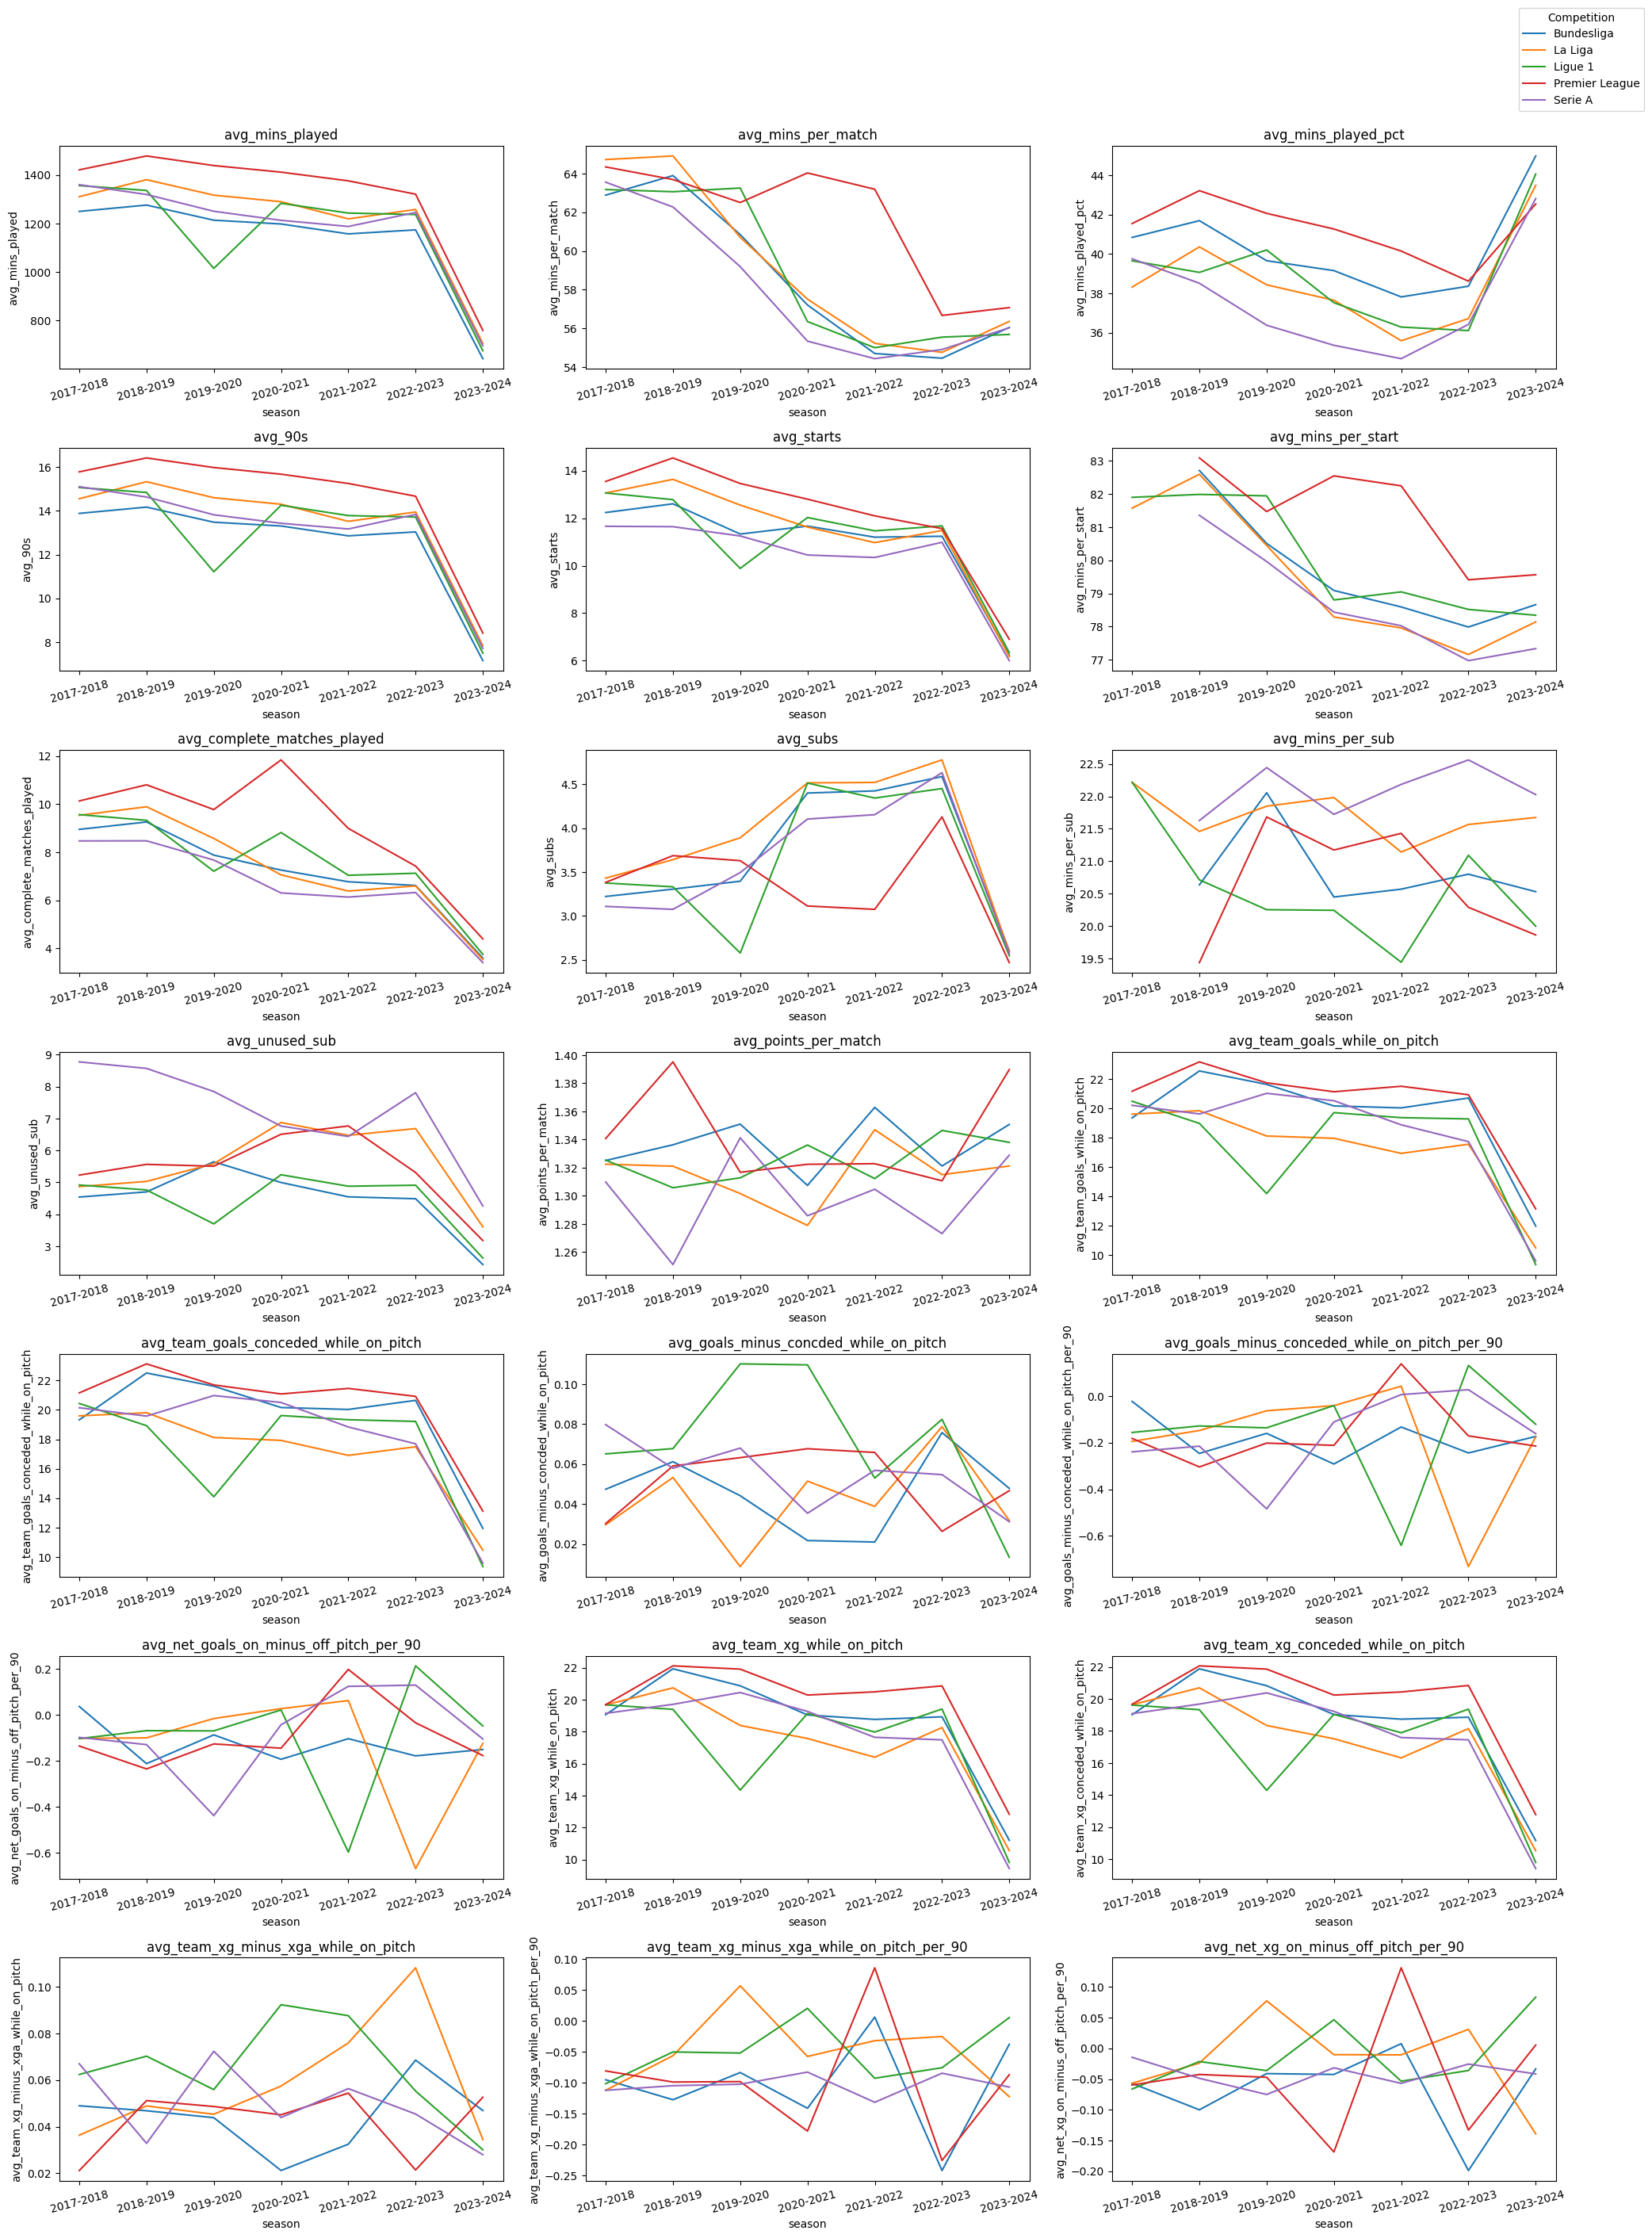

In [110]:
gen_plots.avgs_time_series(groupby='comp', columns=cols)

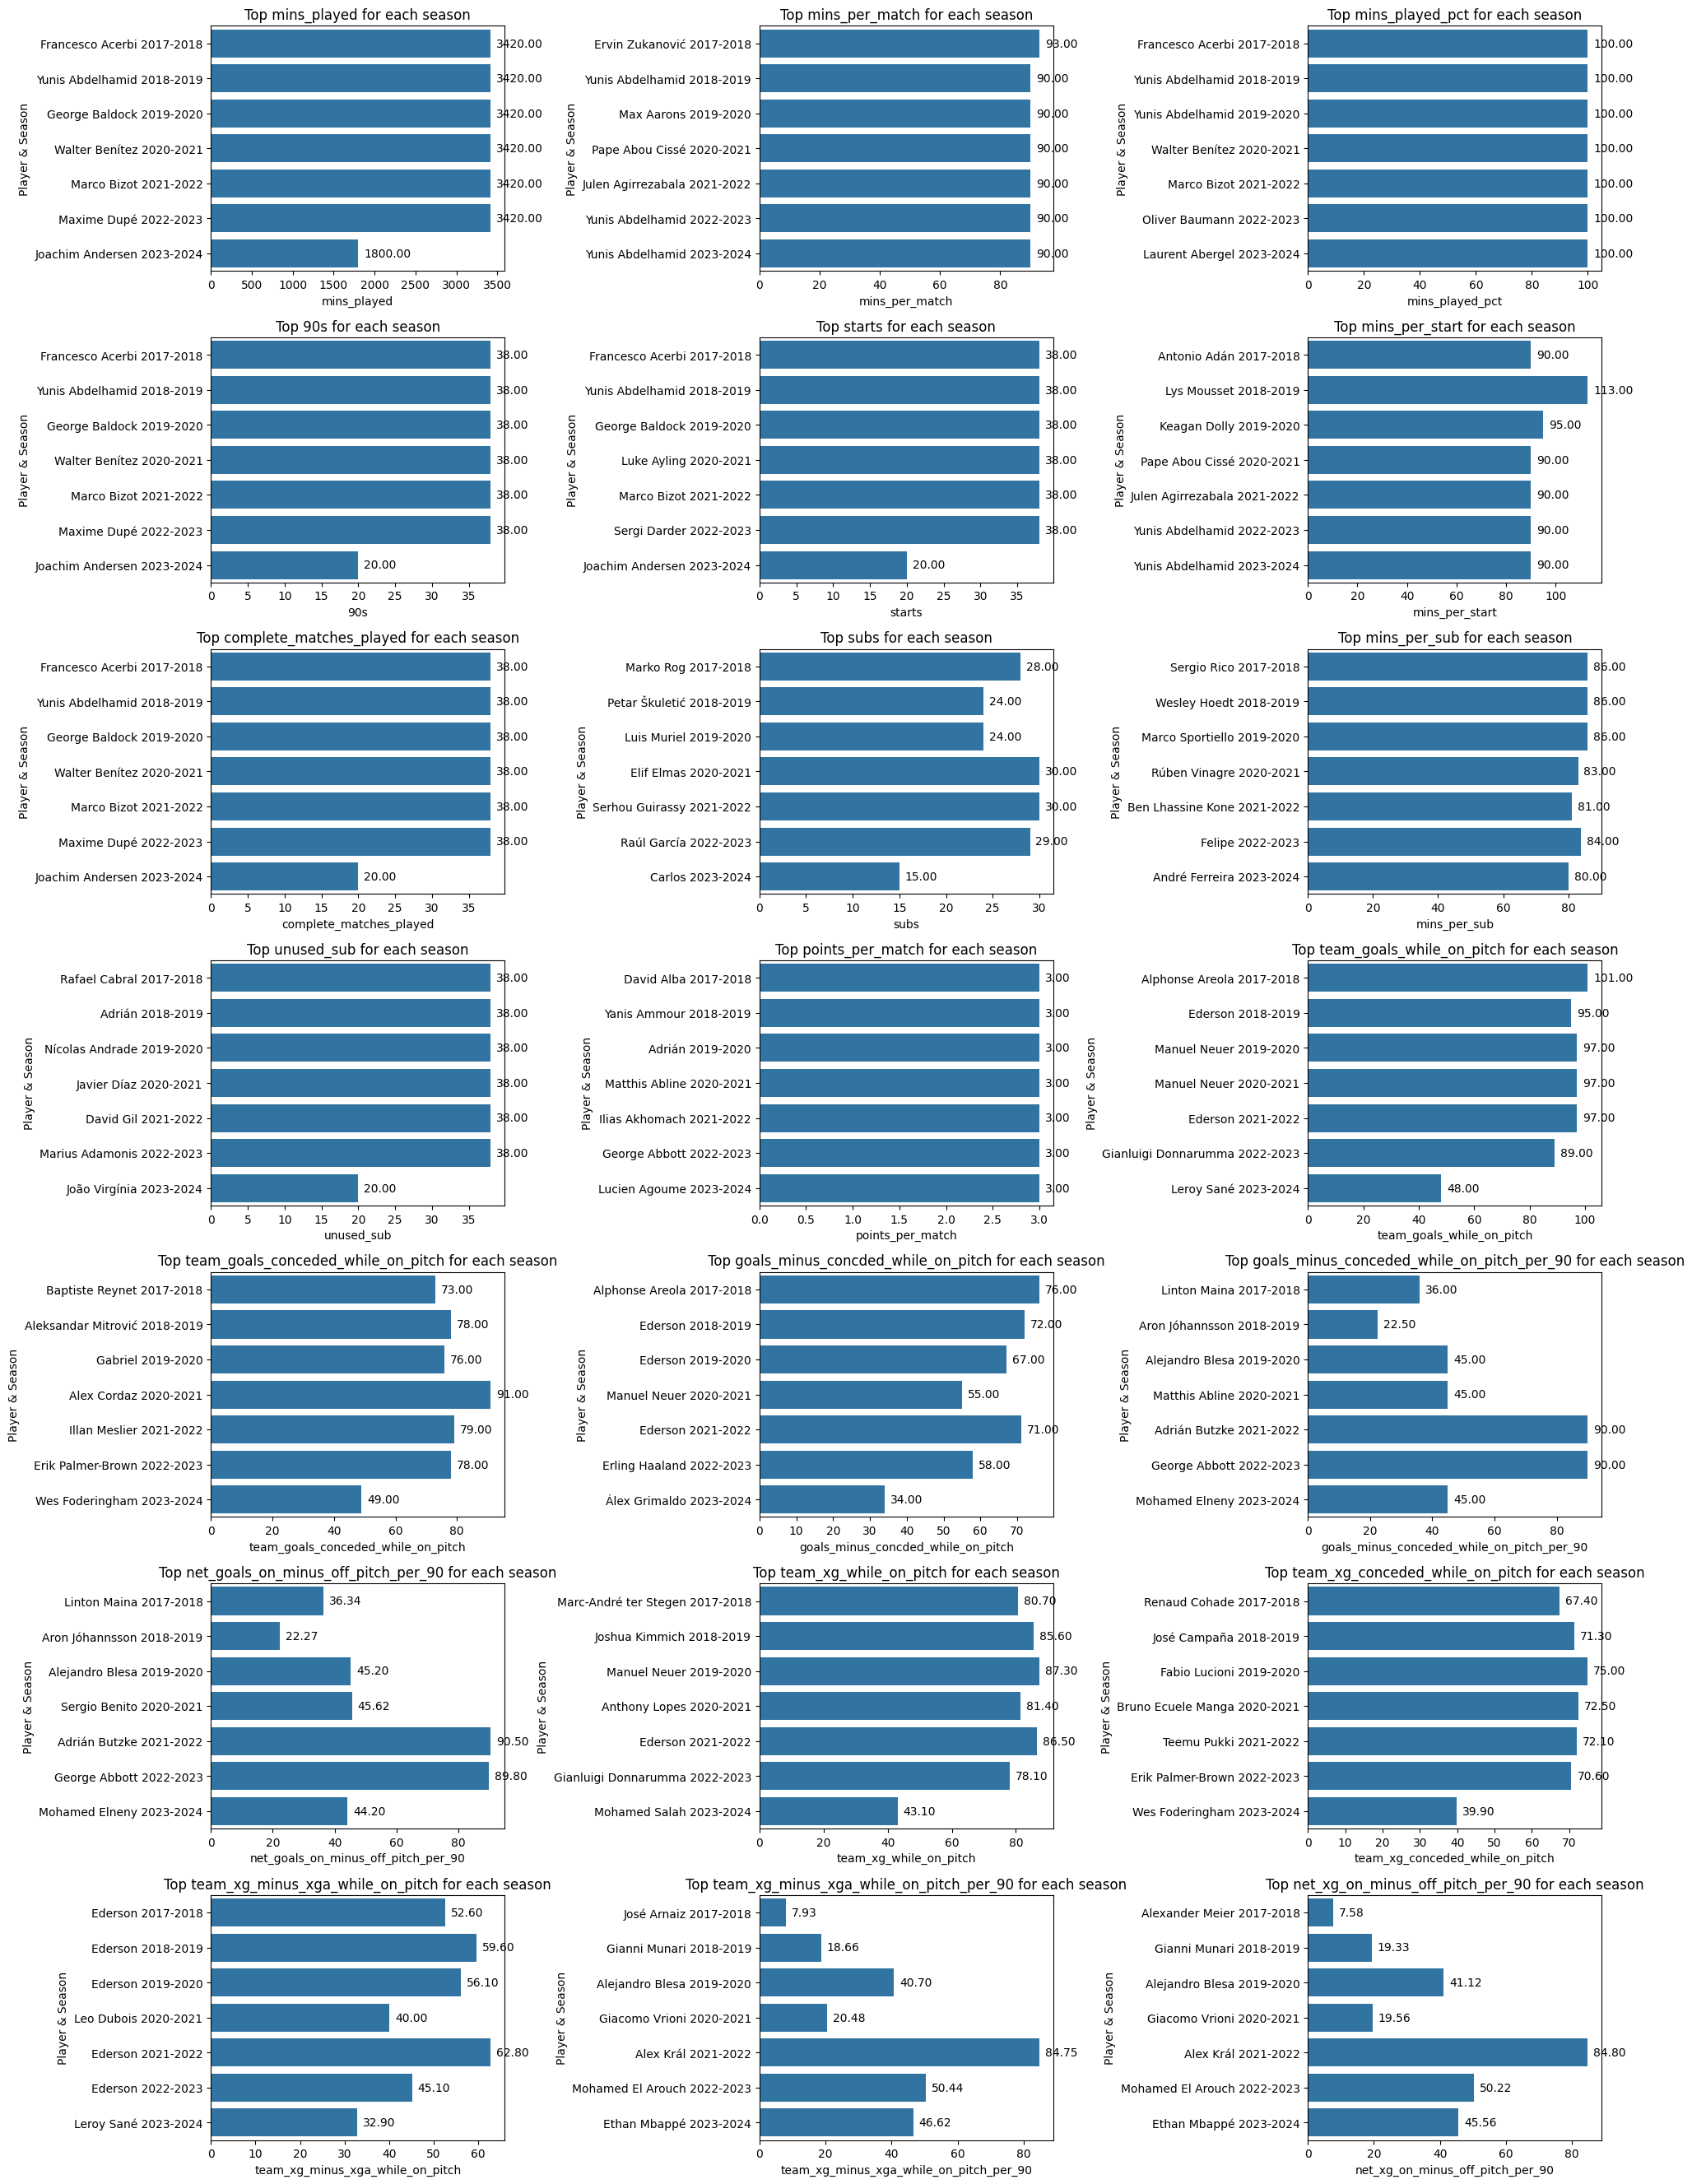

In [111]:
gen_plots.top_per_season(columns=cols)